## Fetching the data from db

In [285]:
import importlib
import utils2

importlib.reload(utils2)
from utils2 import *

In [276]:
all_data = aggregate_joular_node_entity_by_value("spring-boot",25)

## Outliers removal and distribution of all the values

Removing all outliers from the data, using the z-score method

In [277]:
all_data_without_outliers = removeOutliers(all_data)

Len with outliers :  216
Len without outliers (with at least 25 values) :  204


### Shapiro-Wilk test

Testing all data without outliers to see which ones follow a normal distribution and which ones do not.

In [278]:
all_normal_data_without_outliers = removeNonNormalData(all_data_without_outliers)

Number of normal distributions :  110


### Boxplot of remaining values

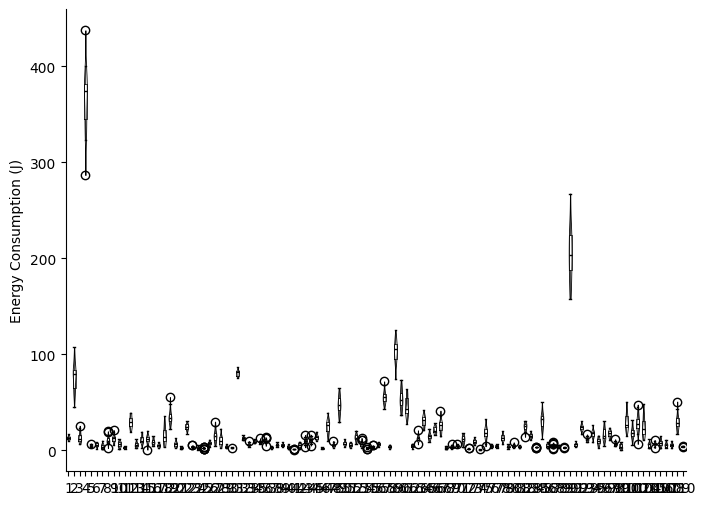

In [279]:
normal_values = [doc["values"] for doc in all_normal_data_without_outliers]
#labels = [doc["measurableElement"]["classMethodSignature"] for doc in all_normal_data_without_outliers]
violin_and_boxplot(normal_values, ylabel="Energy Consumption (J)")

7396a3ec-999a-4150-a8f5-1cfaaa2963c6
There are no ancestors :/

0a1697a3-b153-4ea6-96b7-788176512038
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptMethod 103
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptTestMethod 76

26aa46c9-03c7-4e5d-bc63-cd20866c947e
org.springframework.boot.AbstractApplicationEnvironmentTests.propertyResolverIsOptimizedForConfigurationProperties 59
org.springframework.boot.ApplicationEnvironmentTests.createEnvironment 30

055aa839-43ac-4714-97d2-07a1a949d060
There are no ancestors :/

ab653eef-bd92-4a0c-a1f5-5ae86152c936
There are no ancestors :/



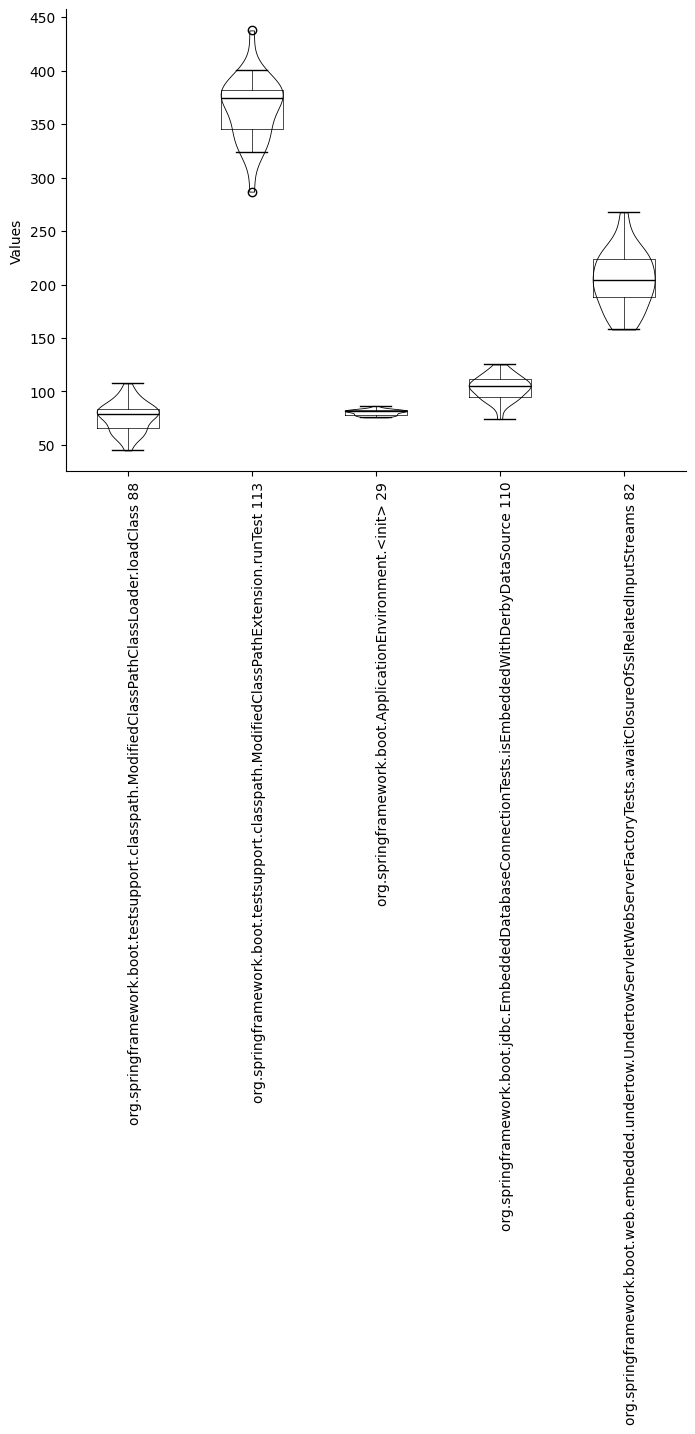

In [286]:
all_project_means = mean_dict(all_normal_data_without_outliers)
#violin_and_boxplot(all_project_means)
first_quartile = filter_highest_data(all_normal_data_without_outliers, all_project_means, 4)
first_quartile_values = [doc["values"] for doc in first_quartile]
labels = [doc["measurableElement"]["classMethodSignature"] + " " + str(doc["lineNumber"]) for doc in first_quartile]

for doc in first_quartile:
    label = doc["measurableElement"]["classMethodSignature"] + " " + str(doc["lineNumber"])
    print(doc["id"])
    get_ancestors_from_joular_node_entity_id(doc["id"])
    print()

violin_and_boxplot(first_quartile_values, labels=labels)